In [1]:
import numpy as np
import pandas as pd
from numpy import loadtxt
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import skfuzzy as fuzz
import mahalanobisDist as md
global str
import csv as csv

In [2]:
hd = np.array(loadtxt("humidity-l.txt", comments="#", delimiter=",", unpack=False))
ph = np.array(loadtxt("peek_hour-l.txt", comments="#", delimiter=",", unpack=False))
rf = np.array(loadtxt("rainfall-l.txt", comments="#", delimiter=",", unpack=False))
tp = np.array(loadtxt("temp-l.txt", comments="#", delimiter=",", unpack=False))
wd = np.array(loadtxt("wind-l.txt", comments="#", delimiter=",", unpack=False))
alldata = np.vstack((hd, ph, rf, tp, wd))

In [3]:
clean_data, outliers, cl_idx, ol_idx = md.removeOutliers(alldata)
days_id = np.array([])
_ = 'Day#'
for i in range (len(cl_idx)):
    days_id = np.append(days_id, _ + str(int(cl_idx[i])))

In [4]:
cleandata_df = pd.DataFrame(clean_data, index=days_id)
#cleandata_df.columns = ['daysID','humidity', 'peek-hour', 'rainfall', 'temp', 'wind']
cleandata_df = cleandata_df.rename(columns = {0:'humidity'})
cleandata_df = cleandata_df.rename(columns = {1:'peek_hour'})
cleandata_df = cleandata_df.rename(columns = {2:'rainfall'})
cleandata_df = cleandata_df.rename(columns = {3:'temp'})
cleandata_df = cleandata_df.rename(columns = {4:'wind'})

print (cleandata_df.head())


       humidity  peek_hour  rainfall  temp  wind
Day#1      54.0       15.0       0.0  20.0   2.0
Day#2      55.0       35.0       0.0  20.0   1.0
Day#3      62.0       10.0       0.0  18.0   3.0
Day#4      62.0       75.0       0.0  20.0   3.0
Day#5      64.0       20.0       0.0  20.0   0.0


In [5]:
cleandata_df.index.names = ['Day']
cleandata_df.columns.names = ['(weather feature)']

print (cleandata_df.head())

pca = PCA(copy=True, n_components=2, whiten=False)
pca.fit(cleandata_df)

cleandata_2d = pca.transform(cleandata_df)

cleandata_df_2d = pd.DataFrame(cleandata_2d)
cleandata_df_2d.index = cleandata_df.index
cleandata_df_2d.columns = ['PCA1','PCA2']

print ("\ncleandata_df_2d.head() :\n", cleandata_df_2d.head())
print('\npca.explained_variance_ratio_ :\n') 
print(pca.explained_variance_ratio_) 

(weather feature)  humidity  peek_hour  rainfall  temp  wind
Day                                                         
Day#1                  54.0       15.0       0.0  20.0   2.0
Day#2                  55.0       35.0       0.0  20.0   1.0
Day#3                  62.0       10.0       0.0  18.0   3.0
Day#4                  62.0       75.0       0.0  20.0   3.0
Day#5                  64.0       20.0       0.0  20.0   0.0

cleandata_df_2d.head() :
             PCA1       PCA2
Day                        
Day#1 -52.534500  16.152361
Day#2 -32.555919  14.798719
Day#3 -57.658565   8.530570
Day#4   7.309282   7.099342
Day#5 -47.712609   6.157579

pca.explained_variance_ratio_ :

[ 0.82273289  0.1325913 ]


cleandata_df_2d.iloc


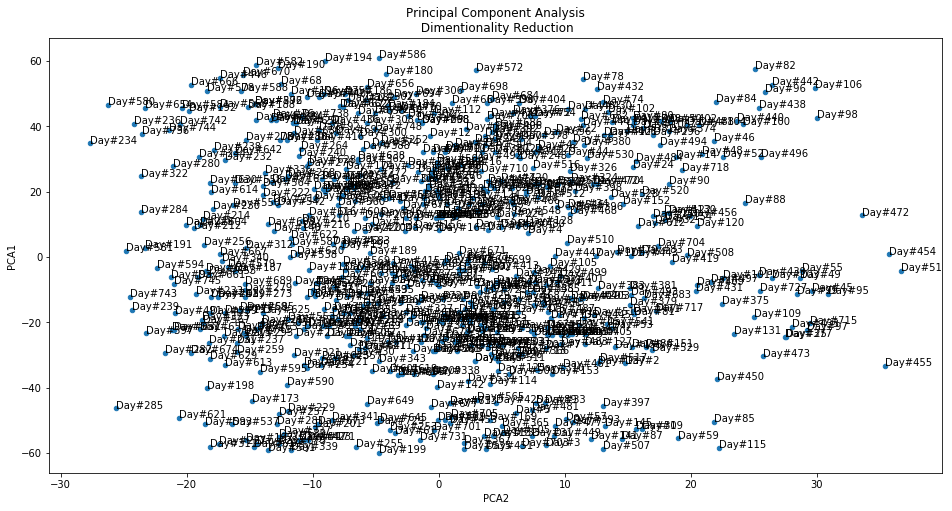

In [6]:
ax = (cleandata_df_2d.plot(kind='scatter',
        title = 'Principal Component Analysis\n Dimentionality Reduction', 
        x='PCA2', y='PCA1', figsize=(16,8)))

print ('cleandata_df_2d.iloc')
print (cleandata_df_2d.iloc)

for i, Day in enumerate(cleandata_df.index):
    ax.annotate(
        Day, 
        (cleandata_df_2d.iloc[i].PCA2, cleandata_df_2d.iloc[i].PCA1)
    )
#cleandata_df_2d.iloc[i].PC3

In [7]:
cleandata_df_2d['Day_mean'] = pd.Series(cleandata_df.mean(axis=1), index=cleandata_df_2d.index)
Day_mean_max = cleandata_df_2d['Day_mean'].max()
Day_mean_min = cleandata_df_2d['Day_mean'].min()
Day_mean_scaled = (cleandata_df_2d.Day_mean-Day_mean_min) / Day_mean_max
cleandata_df_2d['Day_mean_scaled'] = pd.Series(
        Day_mean_scaled, 
        index=cleandata_df_2d.index) 
print (cleandata_df_2d.head())

            PCA1       PCA2  Day_mean  Day_mean_scaled
Day                                                   
Day#1 -52.534500  16.152361      18.2         0.022989
Day#2 -32.555919  14.798719      22.2         0.099617
Day#3 -57.658565   8.530570      18.6         0.030651
Day#4   7.309282   7.099342      32.0         0.287356
Day#5 -47.712609   6.157579      20.8         0.072797


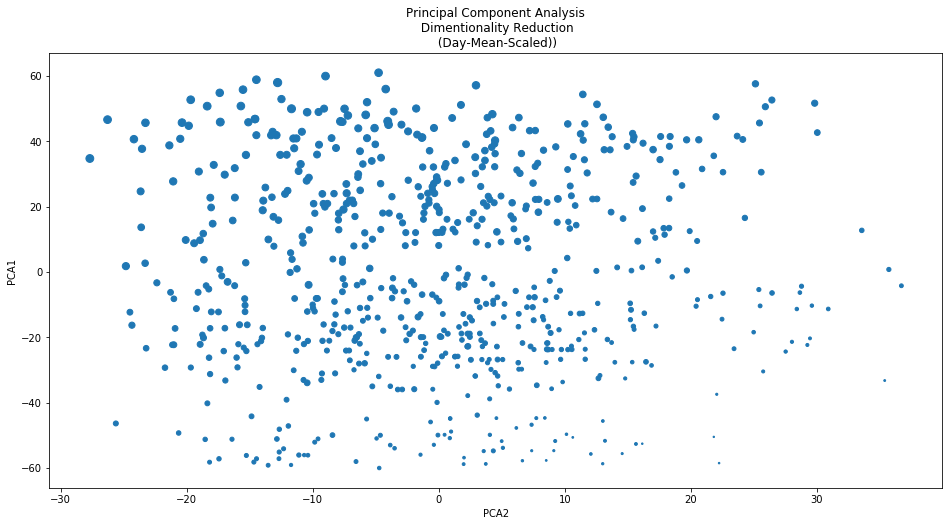

In [8]:
cleandata_df_2d.plot(
    kind='scatter', 
    title = 'Principal Component Analysis\n Dimentionality Reduction\n (Day-Mean-Scaled))',
    x='PCA2', 
    y='PCA1', 
    s=cleandata_df_2d['Day_mean_scaled']*100, 
    figsize=(16,8))

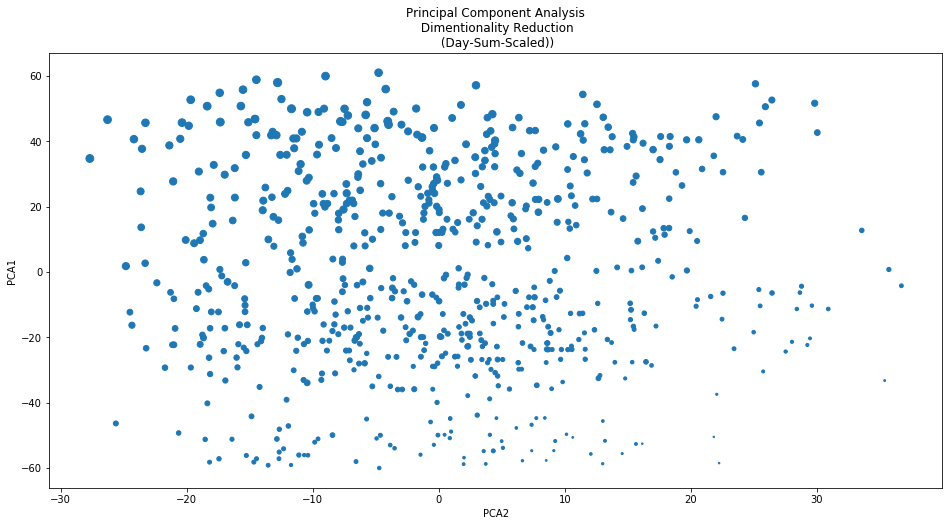

In [9]:
cleandata_df_2d['Day_sum'] = pd.Series(
    cleandata_df.sum(axis=1), 
    index=cleandata_df_2d.index)
Day_sum_max = cleandata_df_2d['Day_sum'].max()
Day_sum_min = cleandata_df_2d['Day_sum'].min()
Day_sum_scaled =(cleandata_df_2d.Day_sum-Day_sum_min) / Day_sum_max
cleandata_df_2d['Day_sum_scaled'] = pd.Series(
        Day_sum_scaled, 
        index=cleandata_df_2d.index)
cleandata_df_2d.plot(
    kind='scatter', 
    title = 'Principal Component Analysis\n Dimentionality Reduction\n (Day-Sum-Scaled))',
    x='PCA2', y='PCA1', 
    s=cleandata_df_2d['Day_sum_scaled']*100, 
    figsize=(16,8))

In [10]:
"""
cleandata_df['humidity'] = cleandata_df['humidity'].astype(np.float32)
cleandata_df['peek_hour'] = cleandata_df['peek_hour'].astype(np.float32)
cleandata_df['rainfall'] = cleandata_df['rainfall'].astype(np.float32)
cleandata_df['temp'] = cleandata_df['temp'].astype(np.float32)
cleandata_df['wind'] = cleandata_df['wind'].astype(np.float32)
"""
cleandata_df.astype(np.float32)
cleandata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, Day#1 to Day#750
Data columns (total 5 columns):
humidity     682 non-null float64
peek_hour    682 non-null float64
rainfall     682 non-null float64
temp         682 non-null float64
wind         682 non-null float64
dtypes: float64(5)
memory usage: 32.0+ KB


In [11]:
#fpcs = np.array([])
#for i in range(2, 30):
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        cleandata_df.T, 7, 1.1, error=0.0005, maxiter=1500, init=None)
#fpcs = np.append(fpcs, fpc)
"""
y = range(2, 30)
#print (y)
plt.scatter(y,fpcs)
plt.title('FPCS graph')
plt.xlabel('Centers')
plt.ylabel('Fpc')
#print (fpc)
"""
#print (existing_df.T)
cluster_membership = np.argmax(u, axis=0)
#print ('fpc : ', fpc)
#print ('cluster_membership : ')
#print (cluster_membership.shape)

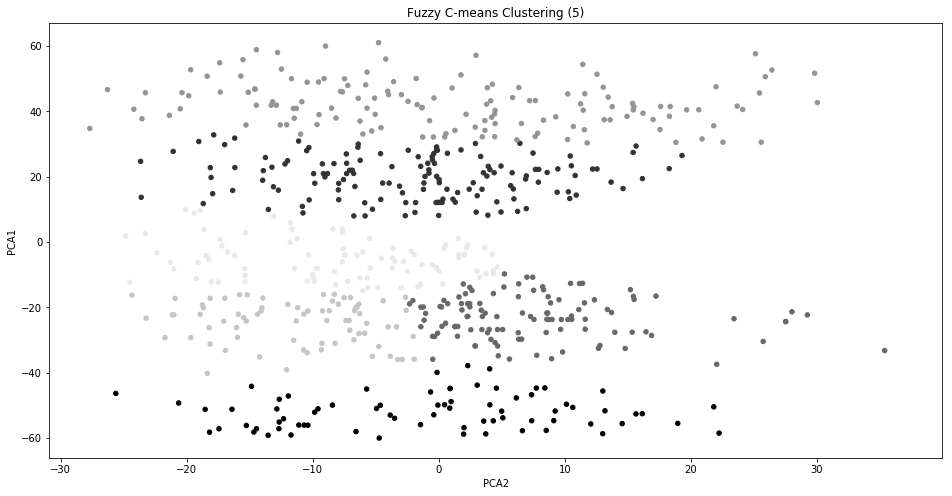

In [12]:
cleandata_df_2d['cluster'] = pd.Series(cluster_membership, index=cleandata_df_2d.index)
#print (cleandata_df_2d.cluster)
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
#print (cleandata_df_2d.cluster.astype(np.float))
#c=cleandata_df_2d.cluster.astype(np.float),
#print (c)
import numpy as np
from itertools import cycle, islice
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(cleandata_df_2d)))
#print (my_colors)
#c = cleandata_df_2d.cluster.astype(np.float).values
#print (c)
#color=['r', 'g', 'b', 'r', 'g', 'b', 'r']
#colors = {0: 'r', 1: 'g', 2: 'b', 3: 'r', 4: 'g', 5: 'b', 6: 'r'}
#print (colors[4])

cleandata_df_2d.plot(
        kind='scatter',
        title = 'Fuzzy C-means Clustering (5)',
        x='PCA2',y='PCA1',
        c = cleandata_df_2d.cluster.astype(np.float),
        figsize=(16,8)
)

In [13]:
#print (cleandata_df_2d.head())
c = cleandata_df_2d.cluster.astype(np.float)
#c = c.rename(columns = {0:'Cluster'})
print (c.head())
#c = pd.DataFrame(c)
dfcolor = pd.DataFrame([[0,'red'],[1,'blue'],[2,'yellow'],],columns=['Cluster','Color'])
print (dfcolor)
mergeddf = pd.merge(c,dfcolor)

Day
Day#1    6.0
Day#2    4.0
Day#3    6.0
Day#4    0.0
Day#5    6.0
Name: cluster, dtype: float64
   Cluster   Color
0        0     red
1        1    blue
2        2  yellow


ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>

In [14]:
from ggplot import *

frame = ggplot(c, aes(x='PC2', y='PC1', color='Day' ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
       )
fig= frame.draw()
fig.show()

AttributeError: 'ggtitle' object has no attribute 'values'